# The Stress Concentration, K in Notched Bend Specimens

## Import packages and define equations

In [1]:
#Import packages and magic functions
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import integrate
import sympy as sym
from sympy import *

%matplotlib inline

The purpose of this program is to solve for the stress concentration in a notched bend specimen.

In [2]:
from IPython.display import SVG, display
display(SVG(url='https://en.wikipedia.org/wiki/Three-point_flexural_test#/media/File:SingleEdgeNotchBending.svg'))

<IPython.core.display.SVG object>

The stress concentation range, $\Delta$K, to start a crack in aluminum alloys should be about **7 MPa**. For a stress ratio of **0.1** this gives a rough maximum stress concentration of **8 MPa** and minimum of **1 MPa**.

In [3]:
#Print nice in sympy, prints variable when called without print function
sym.init_printing()

#Define symbols
a, W, Pq, S, B , z, Kq= sym.symbols("a,W,Pq,S,B,z,Kq")

f = sym.Function("f")

Coefficient $f$ for specimen geometetry based on the crack to width ratio, $\frac{a}{W}$

In [ ]:
#Define and print coefficient f for notched bend specimen in terms of a and W

eq1 = 3.0*((sym.sqrt(a/W))*(1.99-((a/W)*(1-(a/W))*(2.15-(3.93*(a/W))+2.7*((a/W)**2)))) / ((2*(1+2*(a/W))*((1-(a/W))**(3/2))))) - f(a/W)

sym.Eq(eq1)

Create new variable, $z = \frac{a}{W}$, and simplify function for $f$

In [ ]:
#Define and print coefficient f for notched bend specimen in terms of z (a/W)
eq2 = 3.0*((sym.sqrt(z))*(1.99-((z)*(1-(z))*(2.15-(3.93*(z))+2.7*((z)**2)))) / ((2*(1+2*(z))*((1-(z))**(3/2))))) - f(z)

sym.Eq(eq2)

Equation for stress concentraion, $K_q$, for a notched bend specimen

In [ ]:
#Define and print equation for Kq in notched bend specimen
eq3 = (Pq*S/(B*(W**1.5)))*f(a/W) - Kq

sym.Eq(eq3)

Rearrange to solve for load, $P_q$

In [ ]:
#Print reordered equation solving for Pq in notched bend specimen
eq4 = (Kq*(B*W**1.5))/(S*f(z)) - Pq

sym.Eq(eq4)

## Define Parameters

In [13]:
#Crack size in mm and m, a
a = 3.5
a = a/1000
#Specimen depth in mm and m, W
W = 12.6
W = W/1000
#Span of bend supports mm and m,S
S = 50.4
S = S/1000
#Specimen thickness mm and m, B
B = 6
B = B/1000
#Stress Ratio, R
R = 0.1
#Desired stress concentration in MPa and Pa, K
Kmax = 8
Kmax = Kmax*(10**6)

Kmin = Kmax*R
Kmin = Kmin

In [14]:
#Print parameters
print("a =",a,"meters")
print("W =", W,"meters")
print("S =", S,"meters")
print("B =", B,"meters")
print("Kmax =", Kmax,"Pa")
print("Kmin =", Kmin,"Pa")

a = 0.0035 meters
W = 0.0126 meters
S = 0.0504 meters
B = 0.006 meters
Kmax = 8000000 Pa
Kmin = 800000.0 Pa


In [15]:
#Define and print new variable z
z = a/W
print('z = {:.4f}'.format(z))

z = 0.2778


## Solution

Solve for f

In [16]:
f= 3.0*((sym.sqrt(a/W))*(1.99-((a/W)*(1-(a/W))*(2.15-(3.93*(a/W))+2.7*((a/W)**2)))) / ((2*(1+2*(a/W))*((1-(a/W))**(3/2)))))
print('f = {:.4f}'.format(f))

f = 1.4374


Confirmation of f using $z$

In [17]:
f2= 3.0*((sym.sqrt(z))*(1.99-((z)*(1-(z))*(2.15-(3.93*(z))+2.7*((z)**2)))) / ((2*(1+2*(z))*((1-(z))**(3/2)))))
print('f2 = {:.4f}'.format(f2))

f2 = 1.4374


Solve for test load based upon $K_q$, $B$, $W$, $S$ and $f$

In [18]:
#Solve for test load Pq
Pmax = (Kmax*(B*W**1.5))/(S*f)
Pmin = (Kmin*(B*W**1.5))/(S*f)

print('Pmax = {:.2f} N'.format(Pmax))
print('Pmin = {:.2f} N'.format(Pmin))

Pmax = 937.12 N
Pmin = 93.71 N


Define loading curve parameters

In [19]:
#Load wave frequency
frq = 10 #s^-1
#Wave amplitude
Amp = (Pmax - Pmin)/2
#Load wave mean
Mean = (Pmax + Pmin)/2
#Material
mat = "6061 Aluminum"

In [20]:
#Print parameters
print("R =",R)
print("Frequency = {:.0f} Hz".format(frq))
print("Pmax = {:.1f} N".format(Pmax))
print("Pmin = {:.1f} N".format(Pmin))
print("Amplitude = {:.1f} N".format(Amp))
print("Mean = {:.1f} N".format(Amp))

R = 0.1
Frequency = 10 Hz
Pmax = 937.1 N
Pmin = 93.7 N
Amplitude = 421.7 N
Mean = 421.7 N


Plot the cyclic section of the loading curve

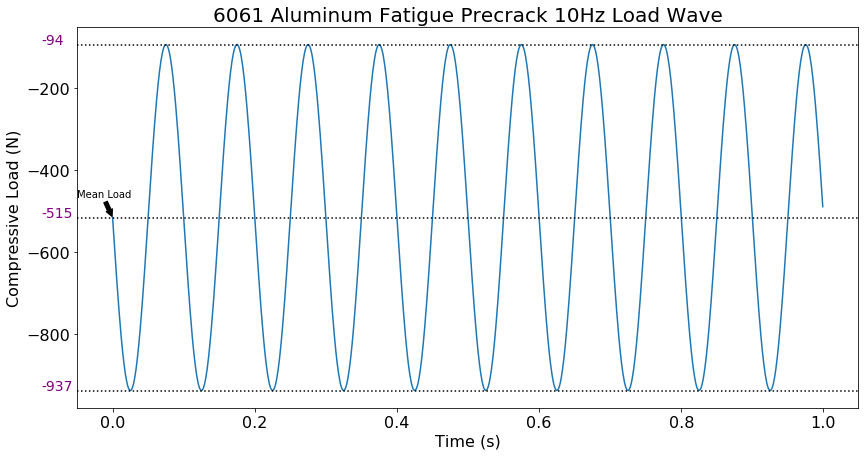

In [30]:
plt.figure(figsize=(14,7))

# Get x values of the sine wave
time = np.arange(0, 1, 0.001);
# Amplitude of the sine wave
amplitude = -Amp*np.sin(frq*time*2*np.pi) - (Mean)
# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude)
# Give a title for the sine wave plot
plt.title('{} Fatigue Precrack {}Hz Load Wave'.format(mat,frq), fontsize=20)
# Give x axis label for the sine wave plot
plt.xlabel('Time (s)', fontsize=16)
# Give y axis label for the sine wave plot
plt.ylabel('Compressive Load (N)', fontsize=16)
#Edit axis fontsize
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

#Additional annotaions
plt.axhline(y=-Mean,linestyle=':', color='k')
plt.annotate('Mean Load', xy=(0, -Mean), xytext=(-0.05, -Mean + 50),
            arrowprops=dict(facecolor='black', headwidth = 7, headlength = 7,shrink=0.05),)

#Additonal tick coordinate
coord = -0.1

#Y tick at mean load
plt.annotate('{:.0f}'.format(-Mean), xy=(0, -Mean), xytext=(coord, -Mean), color='purple', fontsize=14)
#Y tick and line at max load
plt.axhline(y=-Pmax,linestyle=':', color='k')
plt.annotate('{:.0f}'.format(-Pmax), xy=(0, -Pmin), xytext=(coord, -Pmax), color='purple', fontsize=14)
#Y tick and line at min load
plt.axhline(y=-Pmin,linestyle=':', color='k')
plt.annotate('{:.0f}'.format(-Pmin), xy=(0, -Pmin), xytext=(coord, -Pmin), color='purple', fontsize=14)

plt.savefig('6061 Fatigue Curve.png')